In [27]:
from xml.etree import ElementTree as ET
from datetime import timedelta, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def parse_time_delta(time_str):
    t = datetime.strptime(time_str,"%H:%M:%S")
    
    delta = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
    return delta

def parse_time(time_str):
    t = datetime.strptime(time_str,"%H:%M:%S")
    
    return t.time()

10000117
10000211
1000075
10001026
10001027
10001028
10001041
10001172
10001540
10001798
10001800
1000232


In [17]:
def travel_minutes_from_file(path):
    tree = ET.parse(path)
    
    all_travel_times = [parse_time_delta(l.get('trav_time')) for l in tree.findall("./person/plan/leg[@mode='car']")]
    all_travel_time_minutes = [t/timedelta(minutes=1) for t in all_travel_times]
    return np.array(all_travel_time_minutes)

In [37]:
def expirienced_plans_to_trips(path):
    tree = ET.parse(path)
    
    indexx = list()
    
    person_idss = list()
    dep_timess = list()
    trav_timess = list()
    start_linkss = list()
    end_linkss = list()
    
    for person in tree.findall("./person"):
        person_id = person.get("id")
        for plan in person.findall("plan/leg[@mode='car']"):
            dep_time = plan.get("dep_time")
            
            index_string = "{}@{}".format(person_id, dep_time)
            indexx.append(index_string)
            
            trav_time = parse_time_delta(plan.get("trav_time"))
            routes = plan.findall("route")
            assert(len(routes)==1)
            start_link = routes[0].get("start_link")
            end_link = routes[0].get("end_link")
            
            person_idss.append(person_id)
            dep_timess.append(dep_time)
            trav_timess.append(trav_time)
            start_linkss.append(start_link)
            end_linkss.append(end_link)
            
    return pd.DataFrame(index = indexx, data={'person_id': person_idss, 'dep_time': dep_timess, 'trav_time': trav_timess, "start_link":start_linkss, "end_link": end_linkss})



,person_id,dep_time,trav_time,start_link,end_link
10000117@06:43:51,10000117,06:43:51,00:22:51,36631-36632,598221
10000117@12:43:51,10000117,12:43:51,00:31:05,598221,36631-36632
10000211@10:50:19,10000211,10:50:19,00:31:11,297475,75853
10000211@12:20:19,10000211,12:20:19,00:25:51,75853,297475
1000075@08:24:15,1000075,08:24:15,00:08:10,352471,554088-576917
1000075@19:44:15,1000075,19:44:15,00:11:42,554088-576917,352471
10001026@10:46:05,10001026,10:46:05,00:25:13,473327,75036
10001026@11:16:05,10001026,11:16:05,00:34:09,75036,473327
10001026@17:26:05,10001026,17:26:05,00:43:58,473327,42744
10001026@23:46:05,10001026,23:46:05,00:28:46,42744,473327


In [68]:
path_original_higher_capacity = "/Users/clemens/Documents/courses/abmt/projects/abmt_project/simulations/original_higher_capacity_factors/simulation_output/"\
    + "output_experienced_plans.xml"

path_original_freeflow_times_params = "/Users/clemens/Documents/courses/abmt/projects/abmt_project/simulations/original/ile_de_france_population_diluted_caronly.xml"

path_slowed_down_roads = "/Users/clemens/Documents/courses/abmt/projects/abmt_project/simulations/road_slowed_down/simulation_output/output_experienced_plans.xml"

trips_original_freeflow_times = expirienced_plans_to_trips(path_original_freeflow_times_params)
trips_original_higher_capacity = expirienced_plans_to_trips(path_original_higher_capacity)
trips_slowed_down_roads = expirienced_plans_to_trips(path_slowed_down_roads)

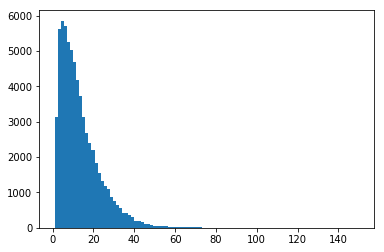

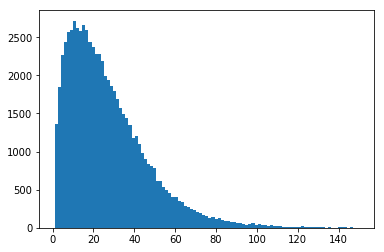

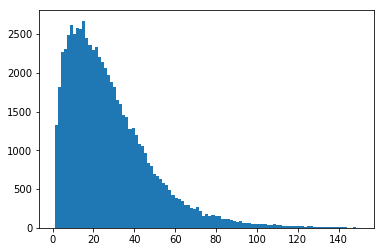

In [70]:
def histogram_of_travel_times(df, bins=100):
    fig,ax = plt.subplots()
    times = [t/timedelta(minutes=1) for t in df.trav_time]
    ax.hist(times, bins)
    
bins=np.linspace(1, 150, 100)
histogram_of_travel_times(trips_original_freeflow_times, bins=bins)
histogram_of_travel_times(trips_original_higher_capacity, bins=bins)
histogram_of_travel_times(trips_slowed_down_roads, bins=bins)

In [136]:
def relative_times(smaller, bigger, smaller_threshold_value = -1, bigger_threshold_value=-1):
    smaller_seconds = smaller.trav_time / timedelta(seconds=1)
    smaller_seconds = smaller_seconds[smaller_seconds >= smaller_threshold_value]
    bigger_seconds = bigger.trav_time / timedelta(seconds=1)
    bigger_seconds = bigger_seconds[bigger_seconds >= bigger_threshold_value]
    ratio = bigger_seconds / smaller_seconds
    return ratio

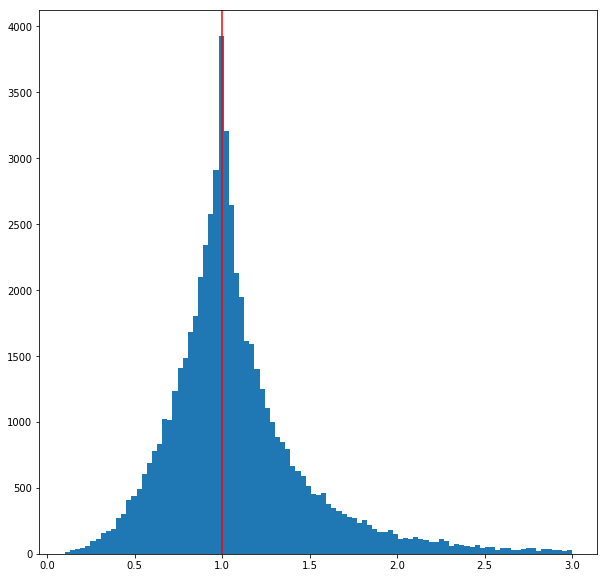

In [137]:
ratio = relative_times(trips_original_higher_capacity, trips_slowed_down_roads, smaller_threshold_value=60, bigger_threshold_value=60)
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(ratio[ratio!=1], bins=np.linspace(0.1, 3, 100))
plt.axvline(1, color='red')

# before. I.e. Freeflow times

(array([4.8729e+04, 2.2228e+04, 8.6140e+03, 3.0460e+03, 8.3100e+02,
        3.0200e+02, 1.3400e+02, 3.9000e+01, 1.1000e+01, 4.0000e+00]),
 array([  0.        ,  10.21333333,  20.42666667,  30.64      ,
         40.85333333,  51.06666667,  61.28      ,  71.49333333,
         81.70666667,  91.92      , 102.13333333]),
 <a list of 10 Patch objects>)

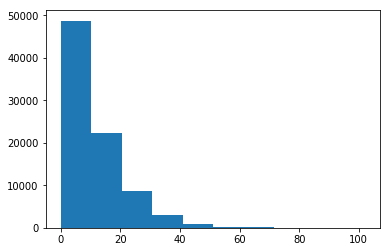